<h3>Load the necessary packages

In [1]:
import json
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import highlight_text
from highlight_text import HighlightText

/Users/rolandkovacs/Documents/repos/friends_of_tracking/friends_of_tracking/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<h3>Load the match data

In [3]:
home_team = "Argentina"
away_team =  "France"
home_color = "#ADD8E6"
away_color = "#00008B"
line_color = '#c7d5cc'
pitch_color = '#444444'

pitch_length_x = 120
pitch_width_y = 80

match_id = 3869685

with open(f"../data/" + str(match_id) + ".json") as f:
    events = json.load(f)

df = pd.json_normalize(events, sep='_')


<h3>Prepare the data for the visualisation

In [4]:
def create_shot_df(df, home_team, away_team):
    shots = df.loc[(df.type_name=='Shot') & (df.minute < 120)]
    
    shots_home = shots[shots.team_name == home_team]
    shots_away = shots[shots.team_name == away_team]
    return (shots_home, shots_away)

shots_home, shots_away = create_shot_df(df, home_team, away_team)

In [5]:
def create_statistics(shot_df):
    outcomes = shot_df.shot_outcome_name.value_counts()
    all_shots = outcomes.sum()
    goals = outcomes.Goal if hasattr(outcomes, 'Goal') else 0
    saves = outcomes.Saved if hasattr(outcomes, 'Saved') else 0
    post = outcomes.Post if hasattr(outcomes, 'Post') else 0
    on_target = saves + goals
    off_target = all_shots - on_target
    blocked = outcomes.Blocked if hasattr(outcomes, 'Blocked') else 0
    xg = round(shot_df.shot_statsbomb_xg.sum(), 2)

    team_stats = {'all_shots': all_shots, 'on_target': on_target, 'off_target': off_target, 'goals': goals,\
        'saves': saves, 'blocked': blocked, 'xg': xg}
    return team_stats

home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

<h1>Step by step

<h3>Create the pitch

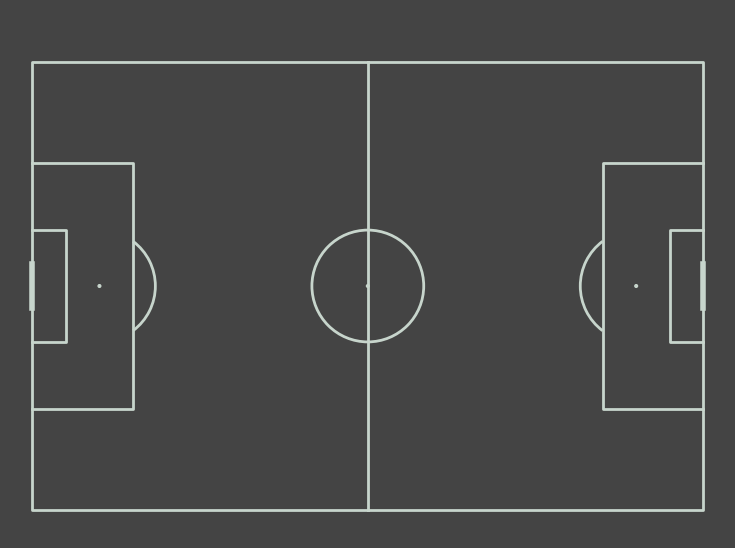

In [6]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

<h3>Plot shots 

In [7]:
def plot_shots(ax, shot_df, color, pitch_length_x, home=True):
    marker_map = {'Goal': "*", 'Saved': "o", 'Off T': "x", 'Blocked': "s", 'Wayward':"x", 'Post': "x"}
    
    locations = shot_df.location.values
    outcomes = shot_df.shot_outcome_name
    shot_xgs = shot_df.shot_statsbomb_xg.values

    for loc, outcome, xg in zip(locations, outcomes, shot_xgs):
        x = loc[0]
        y = loc[1]

        size = xg * 1000

        if home:
            x_cor = pitch_length_x - x + random.randint(-9, 9)/10
            y_cor = y + random.randint(-9, 9)/10
            pitch.scatter(x_cor, y_cor, s=size, color=color, alpha=.8, marker=marker_map[outcome], ax=ax)
        else:
            x_cor = x + random.randint(-9, 9)/10
            y_cor = y + random.randint(-9, 9)/10
            pitch.scatter(x_cor, y_cor, s=size, color=color, alpha=.8, marker=marker_map[outcome], ax=ax) 

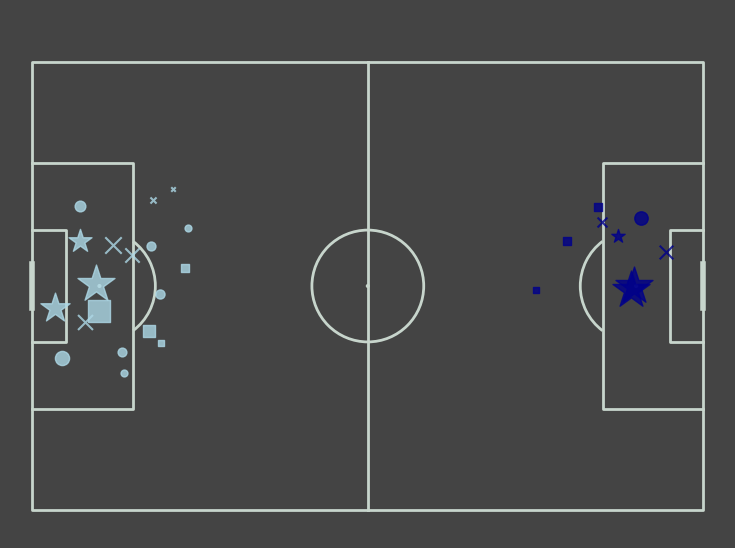

In [8]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

<h3>Add XGoal description

In [9]:
def add_xgoal_desc(line_color, ax):
    ax.text(10, 75, 'XGoal', va='center', ha='center', color=line_color, fontsize=12, fontweight='bold')
    ax.arrow(4, 78, 20, 0, head_width=2, head_length=1, ec=line_color, fc=line_color, width=0.2)

    ax.add_patch(plt.Circle((17, 75), 0.2, color=line_color))
    ax.add_patch(plt.Circle((19, 75), 0.4, color=line_color))
    ax.add_patch(plt.Circle((21.5, 75), 0.8, color=line_color))

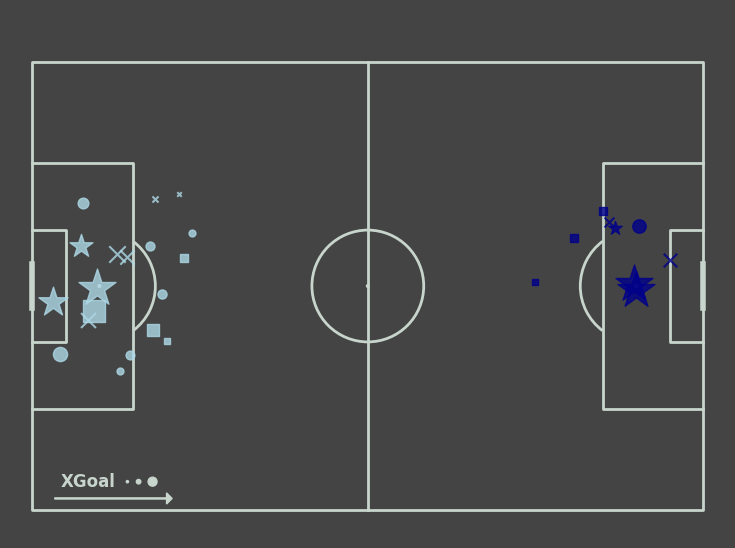

In [10]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

add_xgoal_desc(line_color, axs['pitch'])

<h3>Add title

In [11]:
def add_title(home_team, away_team, home_color, away_color, line_color, subtitle, ax):
    title = f"<{home_team}> <vs> <{away_team}>"
    title_font = 15
    subtitle_font = 13
    highlight_textprops =[
        {"color": home_color, "fontsize":title_font, "fontweight":'bold'},
        {"color": line_color, "fontsize":title_font,  "fontweight":'bold'},
        {"color": away_color, "fontsize":title_font,  "fontweight":'bold'}
    ]

    HighlightText(x=0.5, y=0.7, va='center', ha='center',
                s=title,
                highlight_textprops=highlight_textprops,
                ax=ax)

    ax.text(0.5, 0.0, subtitle, color=line_color, va='center', ha='center', fontsize=subtitle_font) 

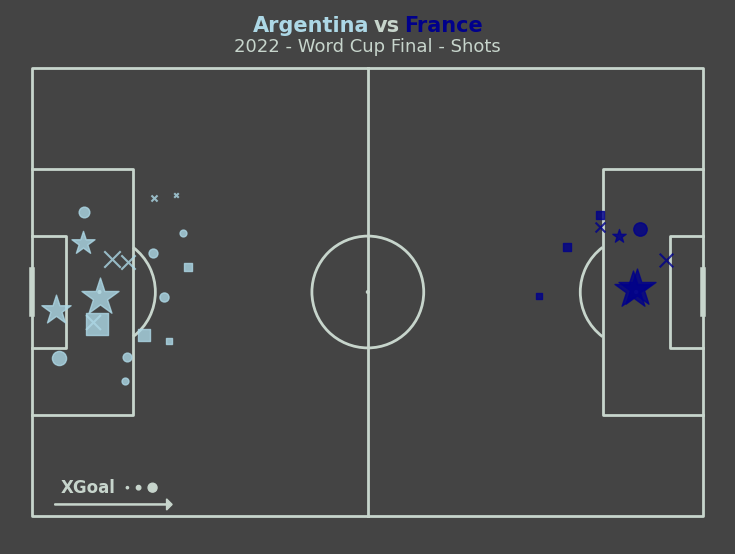

In [12]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

add_xgoal_desc(line_color, axs['pitch'])

subtitle = "2022 - Word Cup Final - Shots"
add_title(home_team, away_team, home_color, away_color, line_color, subtitle, axs['title'])

<h3>Add legend

In [13]:
def plot_legend(line_color, pitch_color):
    goal = Line2D([0], [0], marker='*', markersize=np.sqrt(30), color=line_color, linestyle='None')
    saved = Line2D([0], [0], marker='o', markersize=np.sqrt(30), color=line_color, linestyle='None')
    off_t = Line2D([0], [0], marker='x', markersize=np.sqrt(30), color=line_color, linestyle='None')
    blocked = Line2D([0], [0], marker='s', markersize=np.sqrt(30), color=line_color, linestyle='None')

    plt.legend([goal, saved, off_t, blocked], ['Goal', 'Saved', 'Off target','Blocked'], loc="lower right", 
            markerscale=1.5, scatterpoints=1, fontsize=10, labelcolor=line_color, facecolor = pitch_color, edgecolor = line_color)

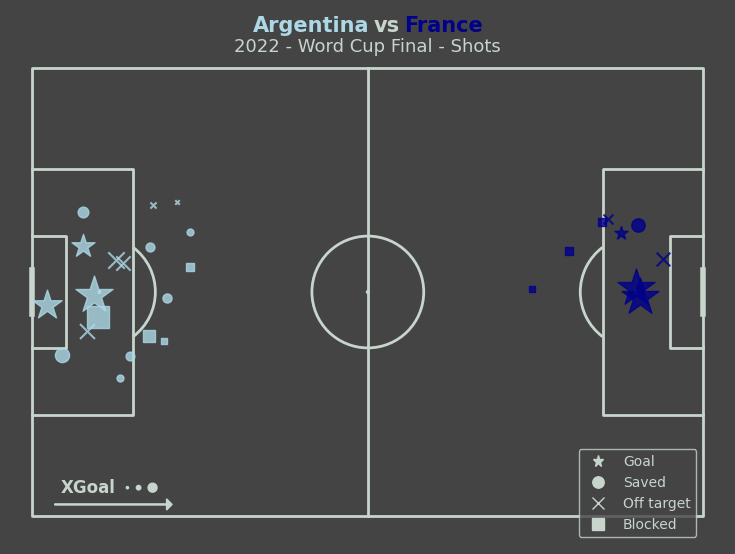

In [14]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

add_xgoal_desc(line_color, axs['pitch'])

subtitle = "2022 - Word Cup Final - Shots"
add_title(home_team, away_team, home_color, away_color, line_color, subtitle, axs['title'])

plot_legend(line_color, pitch_color)
# plt.savefig('asd.png')

<h3>Add statistics

In [15]:
def plot_stats(home_stats, away_stats, line_color, pitch_color, ax):
    stat_font_size = 12
    ax.text(x=60, y=5, s='{}    Goals    {}'.format(home_stats['goals'], away_stats['goals']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=10, s='{}    xGoal    {}'.format(home_stats['xg'], away_stats['xg']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=15, s='{}    Shots    {}'.format(home_stats['all_shots'], away_stats['all_shots']), size=stat_font_size,
            color=line_color,backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=20, s='{}    On target    {}'.format(home_stats['on_target'], away_stats['on_target']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=25, s='{}    Off target    {}'.format(home_stats['off_target'], away_stats['off_target']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=30, s='{}    Saves    {}'.format(home_stats['saves'], away_stats['saves']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=35, s='{}    Blocked    {}'.format(home_stats['blocked'], away_stats['blocked']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')

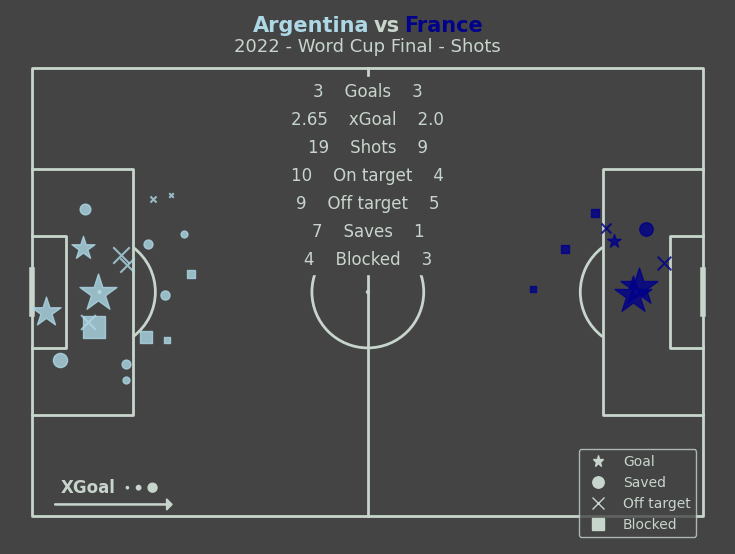

In [16]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

add_xgoal_desc(line_color, axs['pitch'])

subtitle = "2022 - Word Cup Final - Shots"
add_title(home_team, away_team, home_color, away_color, line_color, subtitle, axs['title'])

plot_legend(line_color, pitch_color)

plot_stats(home_stats, away_stats, line_color, pitch_color, axs['pitch'])
# plt.savefig('asd.png')

<h3>Adding footnote

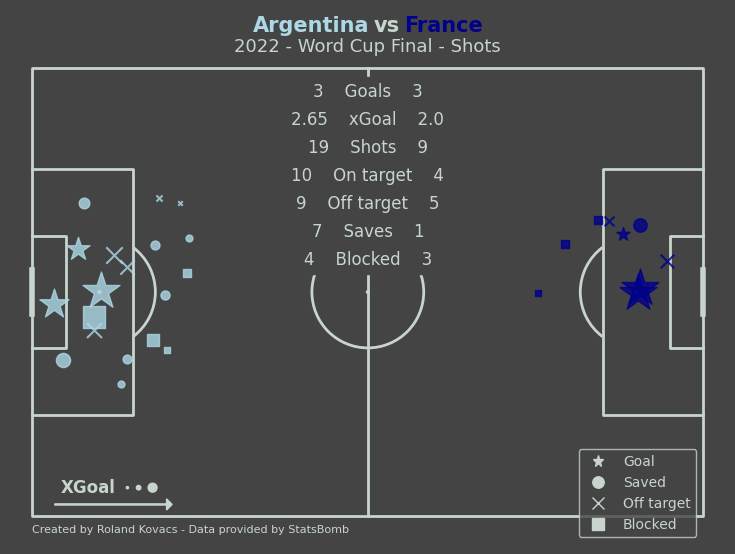

In [17]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home=False)

add_xgoal_desc(line_color, axs['pitch'])

subtitle = "2022 - Word Cup Final - Shots"
add_title(home_team, away_team, home_color, away_color, line_color, subtitle, axs['title'])

plot_legend(line_color, pitch_color)

plot_stats(home_stats, away_stats, line_color, pitch_color, axs['pitch'])

axs['pitch'].text(x=0, y=83, s='Created by Roland Kovacs - Data provided by StatsBomb',
        size=8, color=line_color, backgroundcolor=pitch_color)

# plt.savefig('plot.png')

<h1>Everything together

In [18]:
def create_shot_df(df, home_team, away_team):
    shots = df.loc[(df.type_name=='Shot') & (df.minute < 120)]
    
    shots_home = shots[shots.team_name == home_team]
    shots_away = shots[shots.team_name == away_team]
    return (shots_home, shots_away)


def create_statistics(shot_df):
    outcomes = shot_df.shot_outcome_name.value_counts()
    all_shots = outcomes.sum()
    goals = outcomes.Goal if hasattr(outcomes, 'Goal') else 0
    saves = outcomes.Saved if hasattr(outcomes, 'Saved') else 0
    post = outcomes.Post if hasattr(outcomes, 'Post') else 0
    on_target = saves + goals
    off_target = all_shots - on_target
    blocked = outcomes.Blocked if hasattr(outcomes, 'Blocked') else 0
    xg = round(shot_df.shot_statsbomb_xg.sum(), 2)

    team_stats = {'all_shots': all_shots, 'on_target': on_target, 'off_target': off_target, 'goals': goals,\
        'saves': saves, 'blocked': blocked, 'xg': xg}
    return team_stats


def plot_shots(ax, shot_df, color, pitch_length_x, home_color, away_color, home=True):
    marker_map = {'Goal': "*", 'Saved': "o", 'Off T': "x", 'Blocked': "s", 'Wayward':"x", 'Post': "x"}
    
    locations = shot_df.location.values
    outcomes = shot_df.shot_outcome_name
    shot_xgs = shot_df.shot_statsbomb_xg.values

    for loc, outcome, xg in zip(locations, outcomes, shot_xgs):
        x = loc[0]
        y = loc[1]

        size = xg * 1000

        if home:
            x_cor = pitch_length_x - x + random.randint(-9, 9)/10
            y_cor = y + random.randint(-9, 9)/10
            shotCircle = pitch.scatter(x_cor, y_cor, s=size, color=home_color, alpha=.8, marker=marker_map[outcome], ax=axs['pitch'])
        else:
            x_cor = x + random.randint(-9, 9)/10
            y_cor = y + random.randint(-9, 9)/10
            shotCircle = pitch.scatter(x_cor, y_cor, s=size, color=away_color, alpha=.8, marker=marker_map[outcome], ax=axs['pitch']) 


def add_xgoal_desc(line_color, ax):
    ax.text(10, 75, 'XGoal', va='center', ha='center', color=line_color, fontsize=12, fontweight='bold')
    ax.arrow(4, 78, 20, 0, head_width=2, head_length=1, ec=line_color, fc=line_color, width=0.2)

    ax.add_patch(plt.Circle((17, 75), 0.2, color=line_color))
    ax.add_patch(plt.Circle((19, 75), 0.4, color=line_color))
    ax.add_patch(plt.Circle((21.5, 75), 0.8, color=line_color))


def add_title(home_team, away_team, home_color, away_color, line_color, subtitle, ax):
    title = f"<{home_team}> <vs> <{away_team}>"
    title_font = 15
    subtitle_font = 13
    highlight_textprops =[
        {"color": home_color, "fontsize":title_font, "fontweight":'bold'},
        {"color": line_color, "fontsize":title_font,  "fontweight":'bold'},
        {"color": away_color, "fontsize":title_font,  "fontweight":'bold'}
    ]

    HighlightText(x=0.5, y=0.7, va='center', ha='center',
                s=title,
                highlight_textprops=highlight_textprops,
                ax=ax)

    ax.text(0.5, 0.0, subtitle, color=line_color, va='center', ha='center', fontsize=subtitle_font) 

def plot_legend(line_color, pitch_color):
    goal = Line2D([0], [0], marker='*', markersize=np.sqrt(30), color=line_color, linestyle='None')
    saved = Line2D([0], [0], marker='o', markersize=np.sqrt(30), color=line_color, linestyle='None')
    off_t = Line2D([0], [0], marker='x', markersize=np.sqrt(30), color=line_color, linestyle='None')
    blocked = Line2D([0], [0], marker='s', markersize=np.sqrt(30), color=line_color, linestyle='None')

    plt.legend([goal, saved, off_t, blocked], ['Goal', 'Saved', 'Off target','Blocked'], loc="lower right", 
            markerscale=1.5, scatterpoints=1, fontsize=10, labelcolor=line_color, facecolor = pitch_color, edgecolor = line_color)

def plot_stats(home_stats, away_stats, line_color, pitch_color, ax):
    stat_font_size = 12
    ax.text(x=60, y=5, s='{}    Goals    {}'.format(home_stats['goals'], away_stats['goals']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=10, s='{}    xGoal    {}'.format(home_stats['xg'], away_stats['xg']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=15, s='{}    Shots    {}'.format(home_stats['all_shots'], away_stats['all_shots']), size=stat_font_size,
            color=line_color,backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=20, s='{}    On target    {}'.format(home_stats['on_target'], away_stats['on_target']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=25, s='{}    Off target    {}'.format(home_stats['off_target'], away_stats['off_target']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=30, s='{}    Saves    {}'.format(home_stats['saves'], away_stats['saves']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')
    ax.text(x=60, y=35, s='{}    Blocked    {}'.format(home_stats['blocked'], away_stats['blocked']), size=stat_font_size,
            color=line_color, backgroundcolor=pitch_color, ha='center')

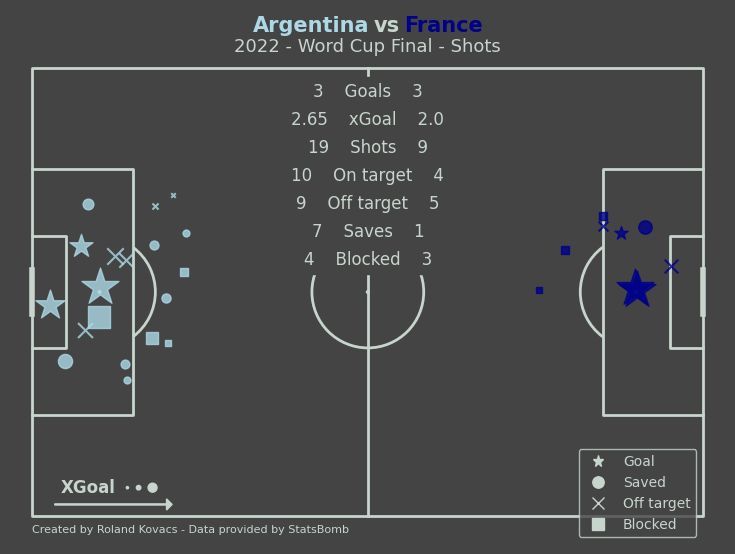

In [19]:
shots_home, shots_away = create_shot_df(df, home_team, away_team)
home_stats = create_statistics(shots_home)
away_stats = create_statistics(shots_away)

pitch = Pitch(pitch_type='statsbomb', pitch_color=pitch_color, line_color=line_color)
fig, axs = pitch.grid(figheight=6, title_height=0.05, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.01)

fig.set_facecolor(pitch_color)

plot_shots(axs['pitch'], shots_home, home_color, pitch_length_x, home_color, away_color, home=True)
plot_shots(axs['pitch'], shots_away, away_color, pitch_length_x, home_color, away_color, home=False)

add_xgoal_desc(line_color, axs['pitch'])

subtitle = "2022 - Word Cup Final - Shots"
add_title(home_team, away_team, home_color, away_color, line_color, subtitle, axs['title'])

plot_legend(line_color, pitch_color)

plot_stats(home_stats, away_stats, line_color, pitch_color, axs['pitch'])

axs['pitch'].text(x=0, y=83, s='Created by Roland Kovacs - Data provided by StatsBomb',
        size=8, color=line_color, backgroundcolor=pitch_color)

# plt.savefig('plot.png')